In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
plt.close('all')

In [ ]:
input_training = 2*np.random.rand(3000,2)-1
input_training[:,1] = np.zeros(3000)

def label(data):
  l = len(data[:,0])
  etichetta = np.zeros((l,1))
  
  for i in range(l):
    if np.abs(np.abs(data[i,0])-0.5)<1/9:
      etichetta[i][0] = 1

  return(etichetta)

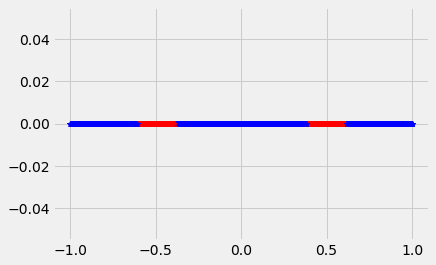

In [ ]:
input_label = label(input_training)

for i in range(len(input_label[:,0])):
  if input_label[i,0]==1:
    plt.plot(input_training[i,0],input_training[i,1],'r-*')
  else:
    plt.plot(input_training[i,0],input_training[i,1],'b-*')


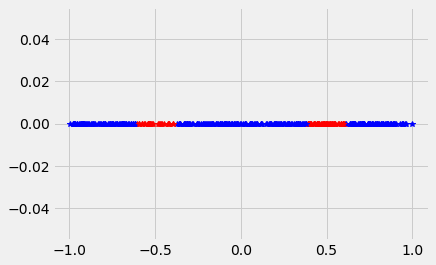

In [ ]:
input_test = 2*np.random.rand(400,2)-1
input_test[:,1] = np.zeros(400)

label_test = label(input_test)

for i in range(len(label_test[:,0])):
  if input_label[i,0]==1:
    plt.plot(input_training[i,0],input_training[i,1],'r-*')
  else:
    plt.plot(input_training[i,0],input_training[i,1],'b-*')

In [ ]:
import tensorflow as tf
from keras import activations
from keras import layers
from keras import models

class Nuovo(layers.Layer):
  def __init__(self, units):
    super(Nuovo, self).__init__()
    self.units = units
  
  def call(self, inputs):

    mat = self.w
    vec = tf.multiply(0.01,activations.tanh(tf.matmul(inputs,mat) + self.b))
    vec = tf.add(inputs,vec)

    return vec
  
  def build(self, input_shape):
    self.w = self.add_weight(
        name = 'w',
        shape=(input_shape[-1], self.units),
        initializer = 'random_normal',
        trainable = True,
    )

    self.b = self.add_weight(
        name='b',
        shape=(self.units,),
        initializer='zeros',
        trainable=True,
    )

In [ ]:
model2 = models.Sequential()

nlayer = 100

for i in range(nlayer):
  model2.add(Nuovo(2))

model2.add(layers.Dense(1,activation = 'sigmoid')) #output layer

In [ ]:
import keras.optimizers as optimizers
opt = optimizers.Adam(learning_rate=0.1)
model2.compile(optimizer=opt, loss='mean_squared_error', metrics=['acc']);
history = model2.fit(input_training, input_label, epochs=500);

Epoch 1/500
94/94 [==============================] - 1s 7ms/step - loss: 0.1739 - acc: 0.7760
Epoch 2/500
94/94 [==============================] - 1s 7ms/step - loss: 0.1713 - acc: 0.7823
Epoch 3/500
94/94 [==============================] - 1s 7ms/step - loss: 0.1717 - acc: 0.7823
Epoch 4/500
94/94 [==============================] - 1s 7ms/step - loss: 0.1709 - acc: 0.7823
Epoch 5/500
94/94 [==============================] - 1s 8ms/step - loss: 0.1705 - acc: 0.7823
Epoch 6/500
94/94 [==============================] - 1s 7ms/step - loss: 0.1710 - acc: 0.7823
Epoch 7/500
94/94 [==============================] - 1s 7ms/step - loss: 0.1583 - acc: 0.7970
Epoch 8/500
94/94 [==============================] - 1s 7ms/step - loss: 0.1043 - acc: 0.8627
Epoch 9/500
94/94 [==============================] - 1s 7ms/step - loss: 0.0963 - acc: 0.8680
Epoch 10/500
94/94 [==============================] - 1s 7ms/step - loss: 0.0865 - acc: 0.8793
Epoch 11/500
94/94 [==============================] - 1s 7m

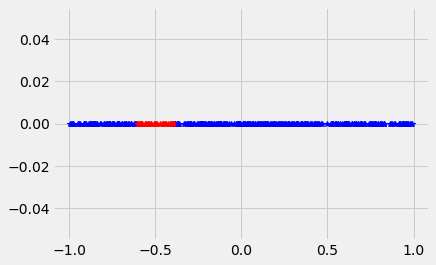

In [ ]:
v = model2.predict(input_test)
for i in range(len(v)):
  if v[i]>0.5:
    plt.plot(input_test[i,0],input_test[i,1],'r-*')
  else:
    plt.plot(input_test[i,0],input_test[i,1],'b*')

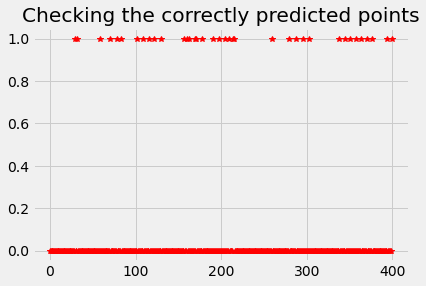

In [ ]:
for i in range(len(v)):
  if v[i]>0.5:
    v[i] = 1
  else:
    v[i] = 0

r = np.abs(v-label_test)
plt.plot(range(len(v)),r,'r*')
plt.title('Checking the correctly predicted points')
plt.show()

In [ ]:
from keras import Model
extractor = Model(inputs=model2.inputs,
                        outputs=[layer.output for layer in model2.layers])
features = extractor(input_test)
#print(features[:][:][50]) #returns the output of the 50th layer, which is always a list of size 200x3 a part for the last layer which is 200x1

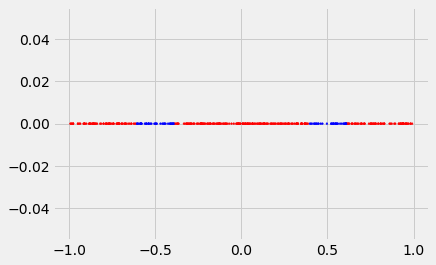

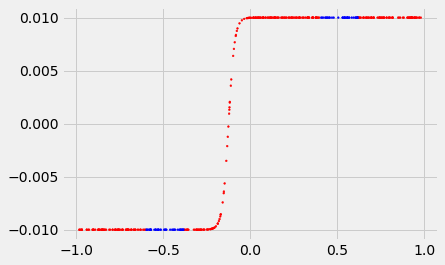

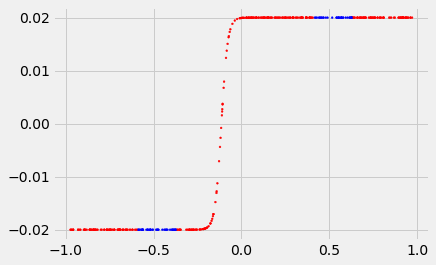

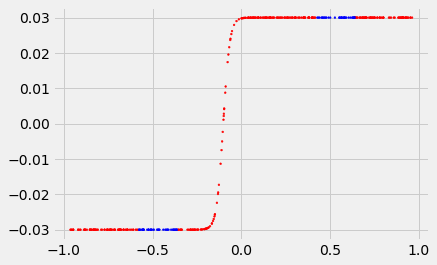

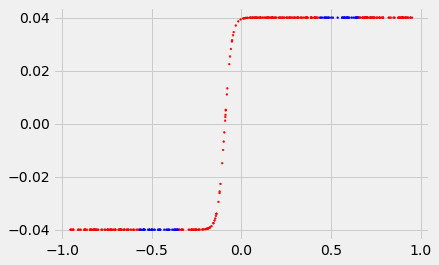

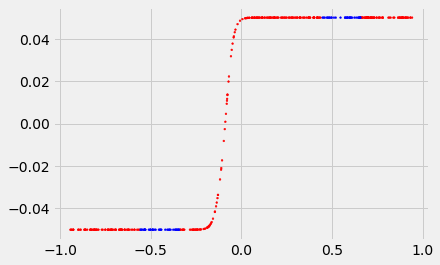

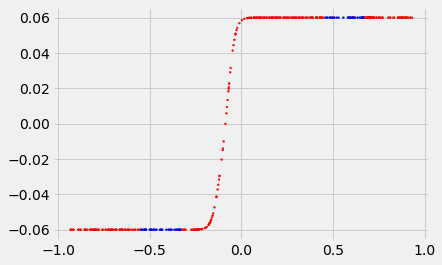

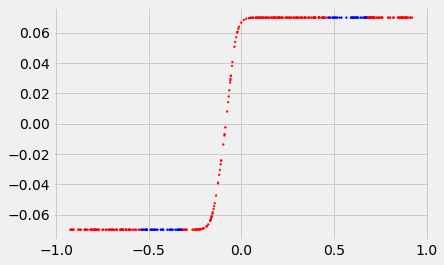

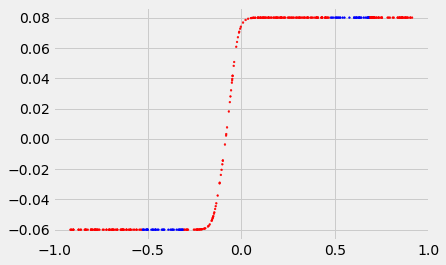

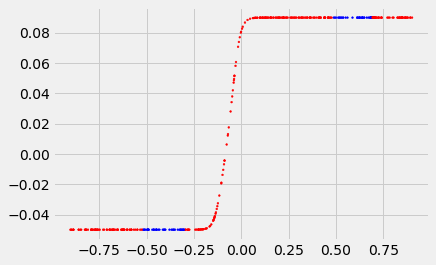

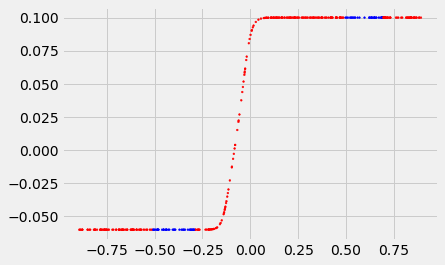

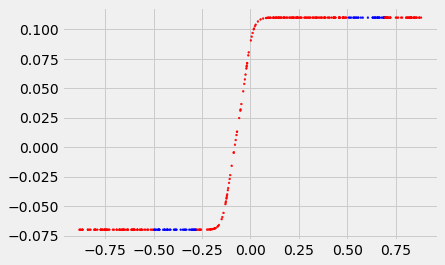

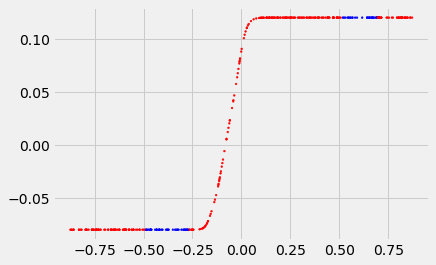

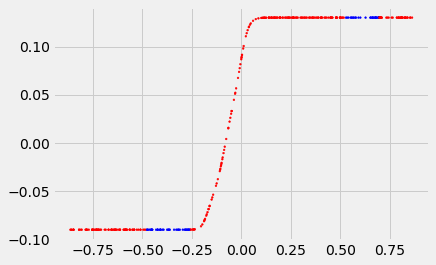

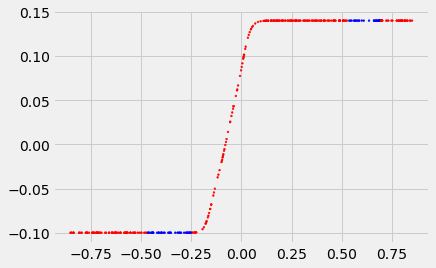

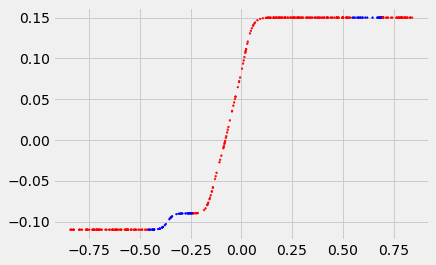

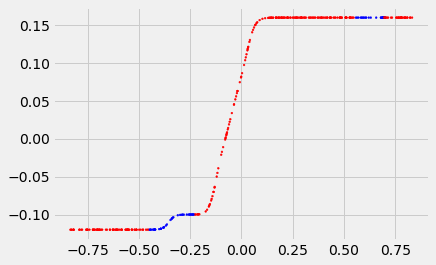

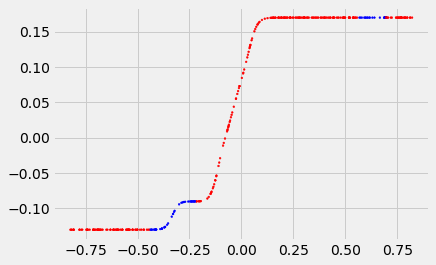

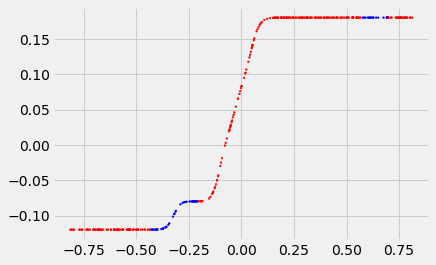

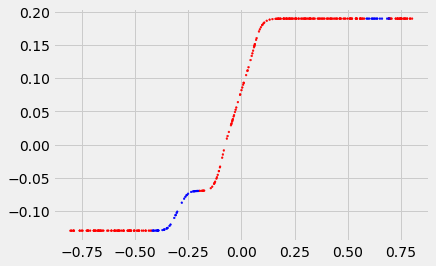

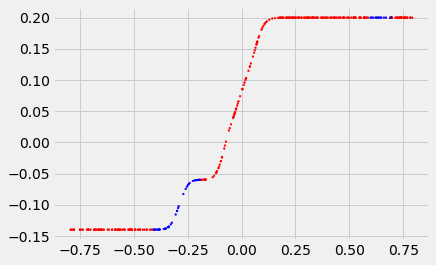

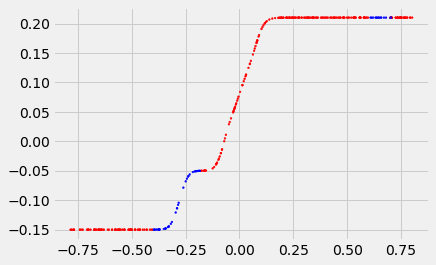

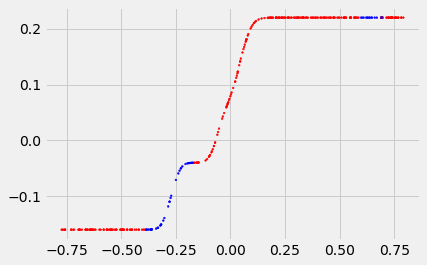

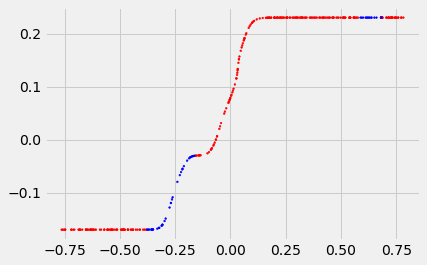

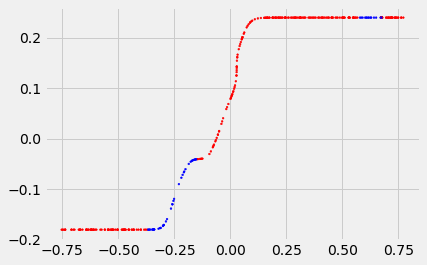

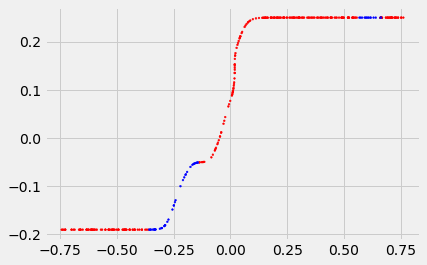

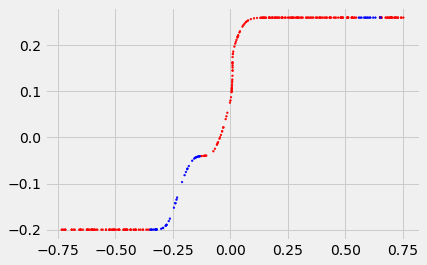

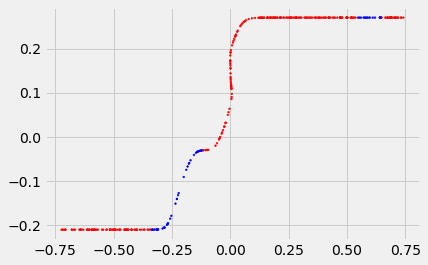

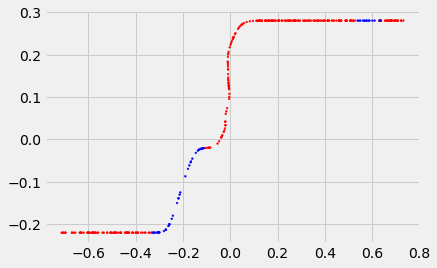

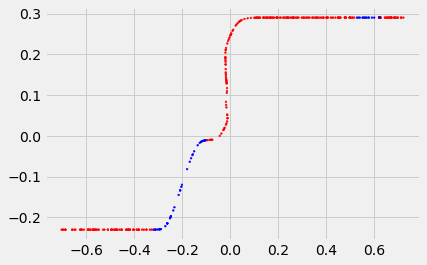

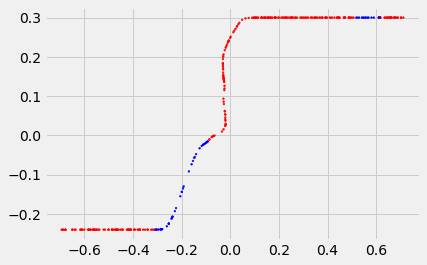

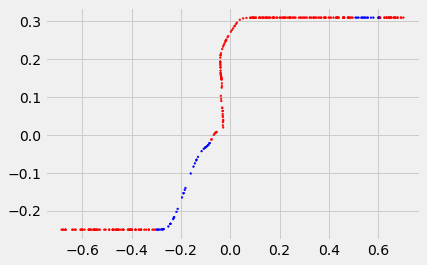

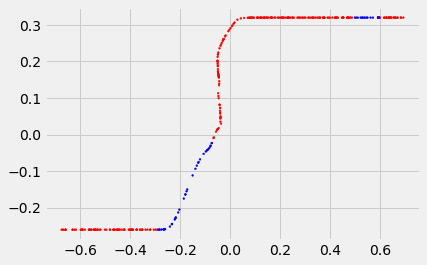

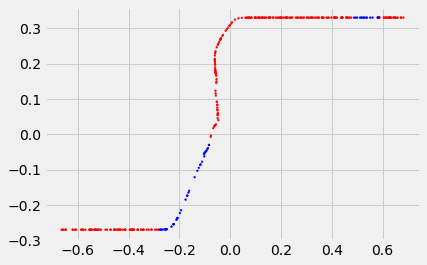

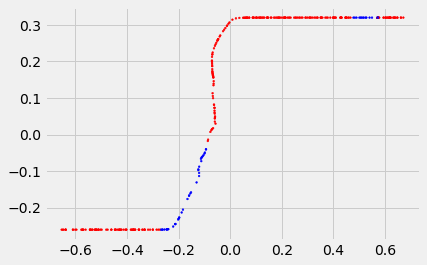

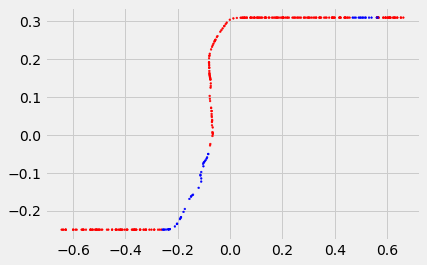

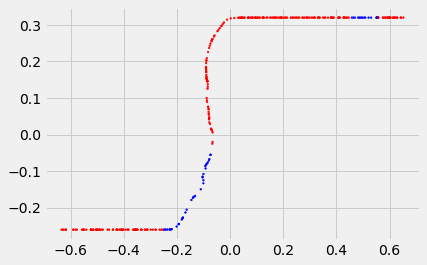

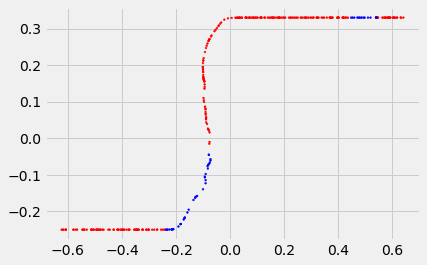

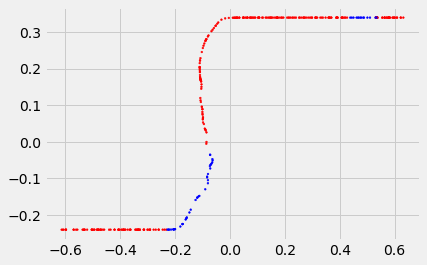

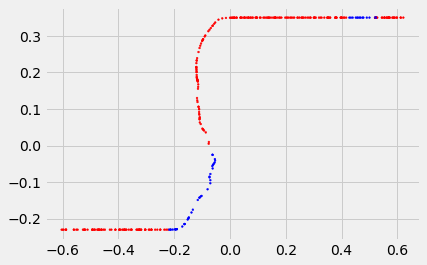

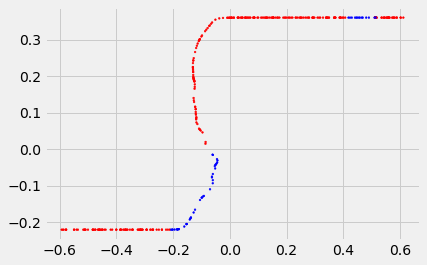

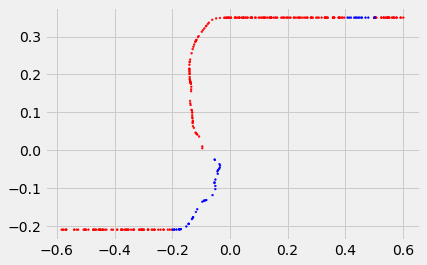

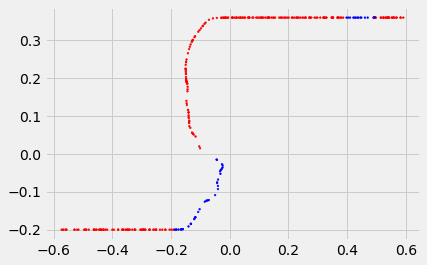

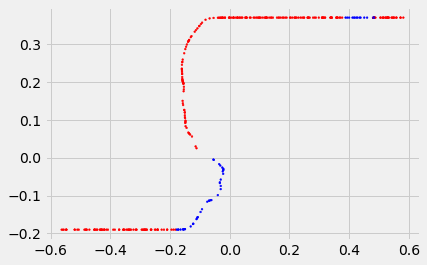

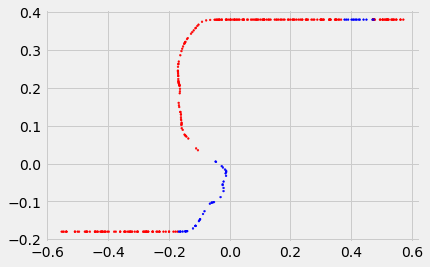

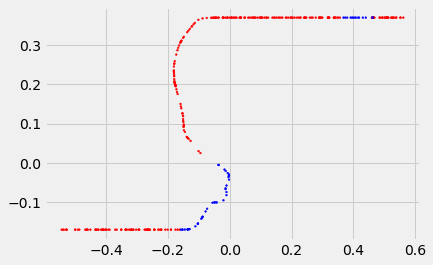

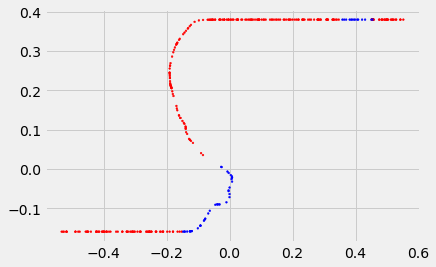

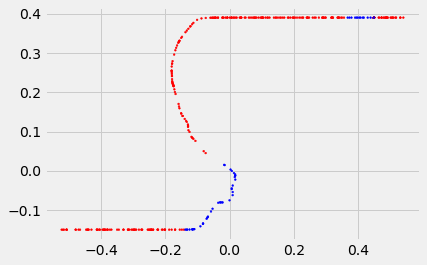

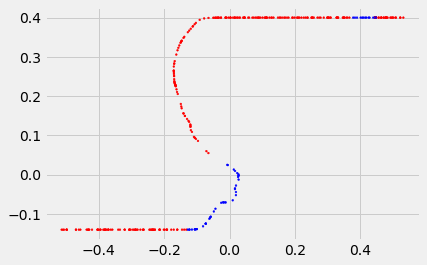

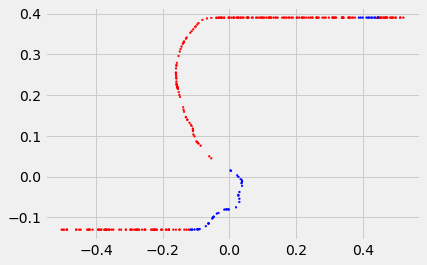

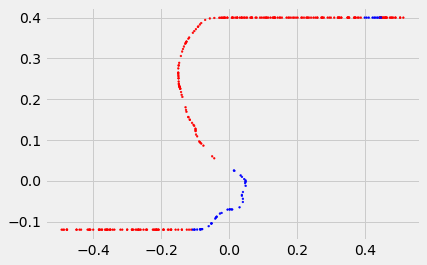

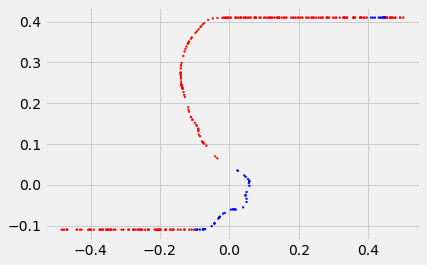

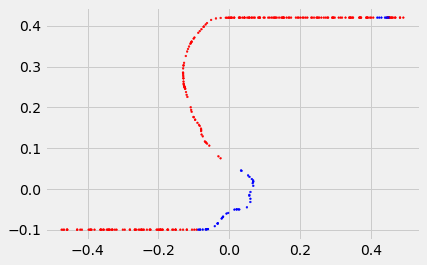

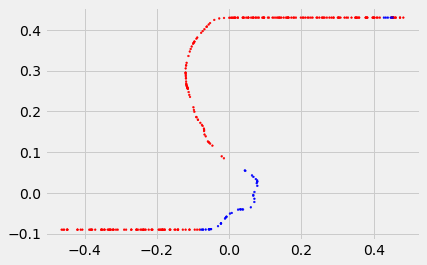

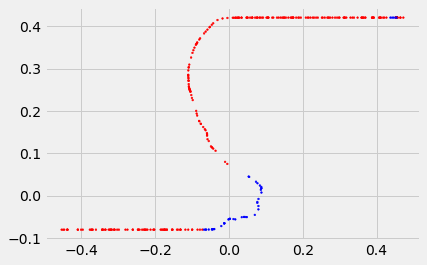

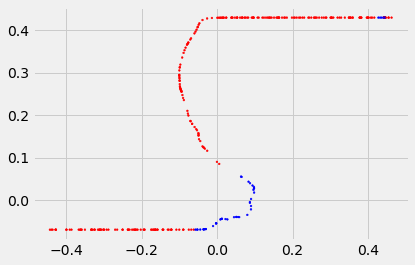

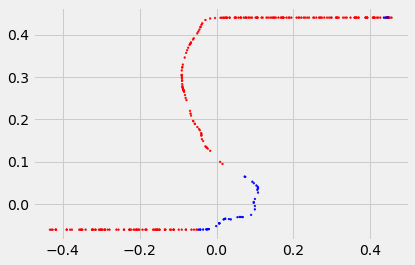

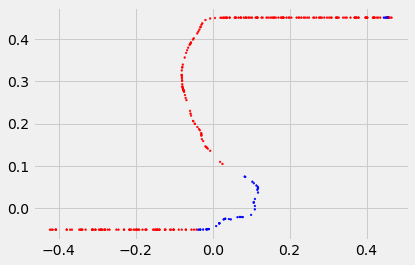

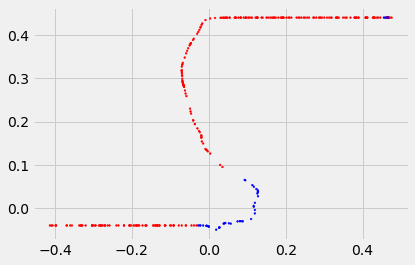

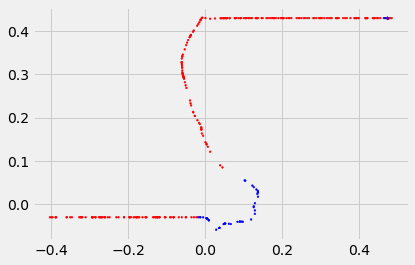

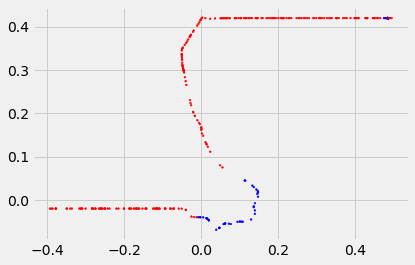

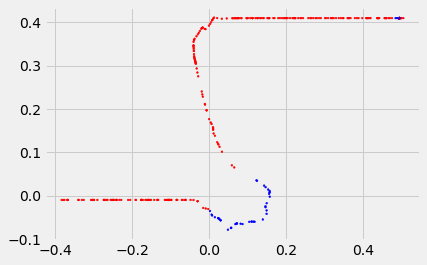

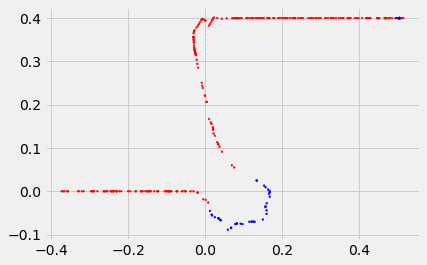

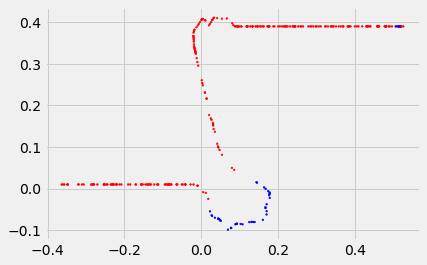

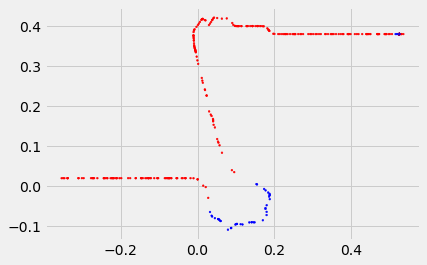

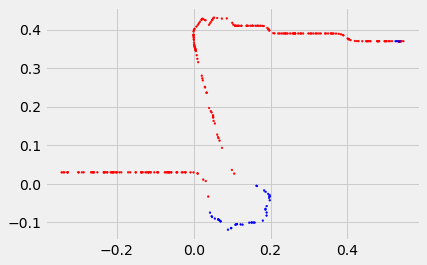

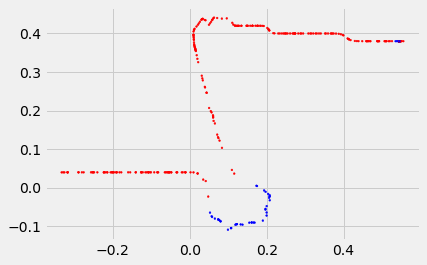

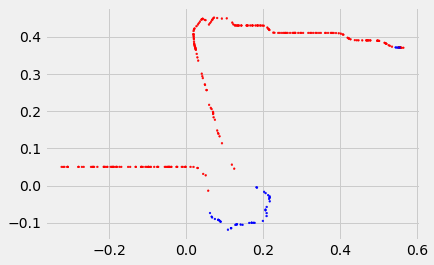

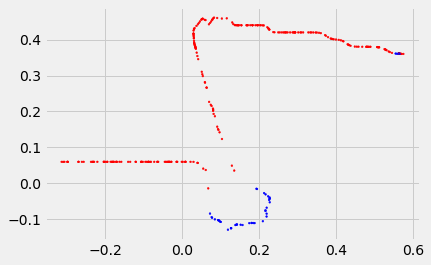

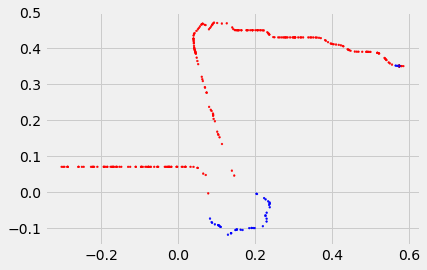

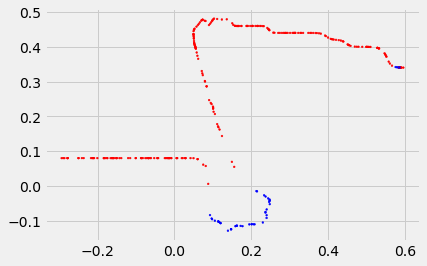

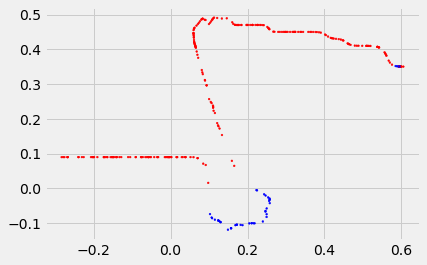

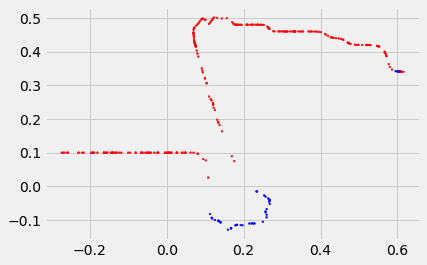

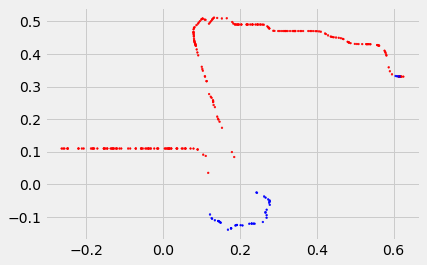

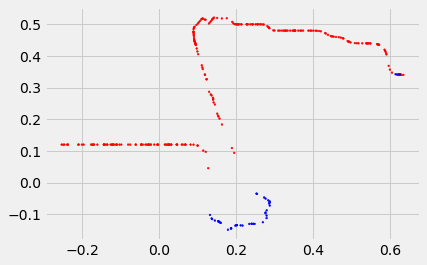

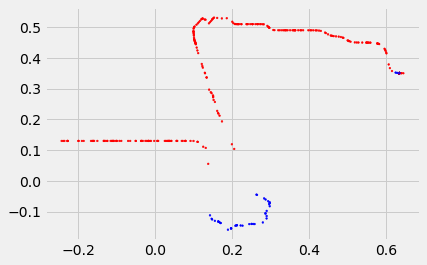

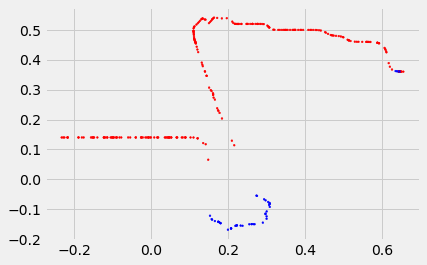

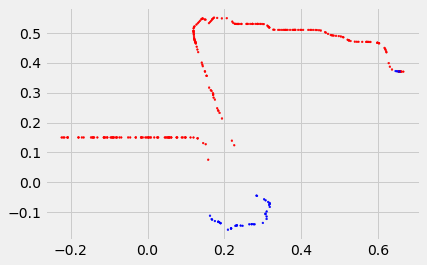

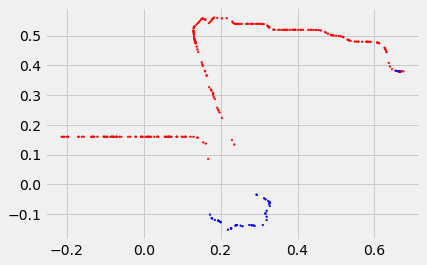

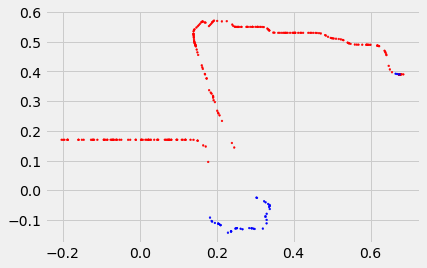

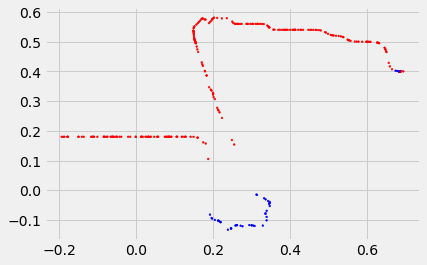

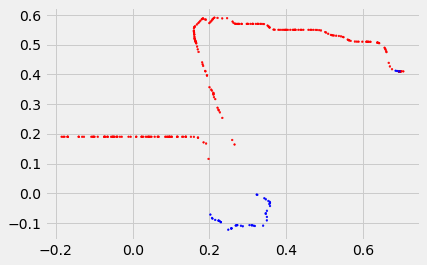

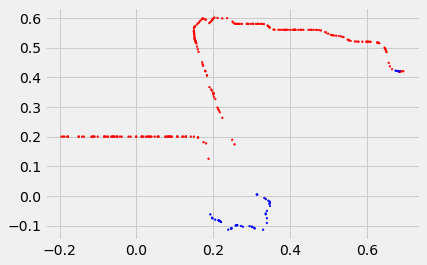

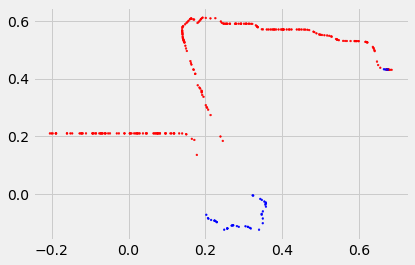

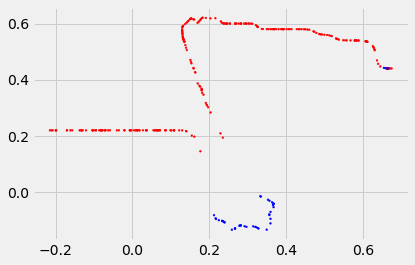

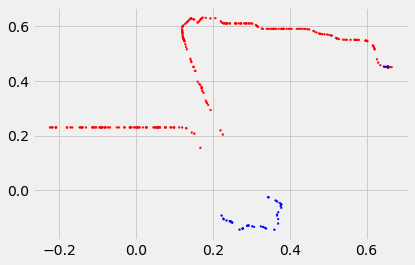

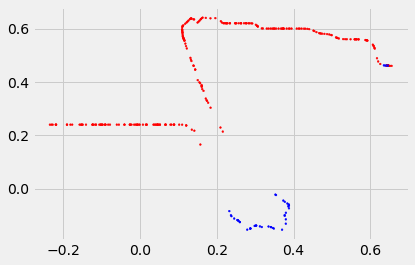

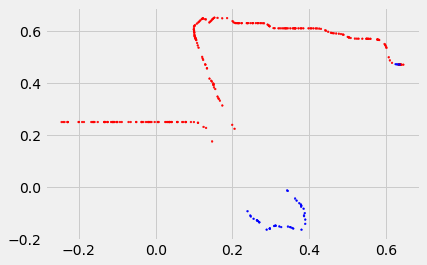

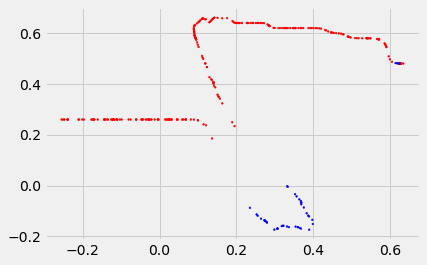

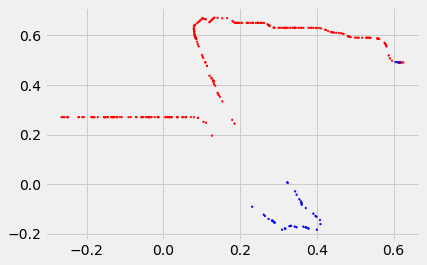

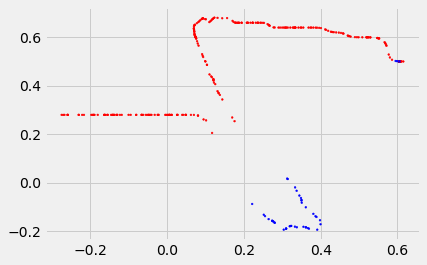

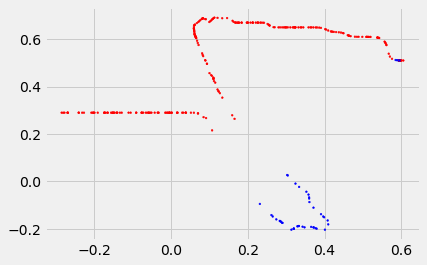

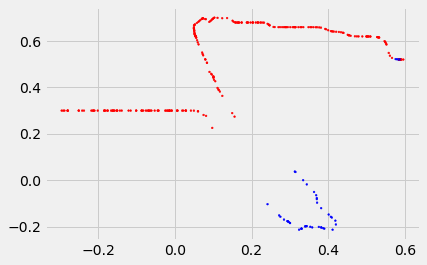

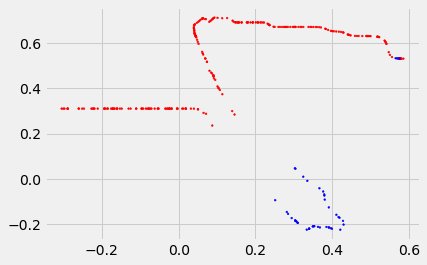

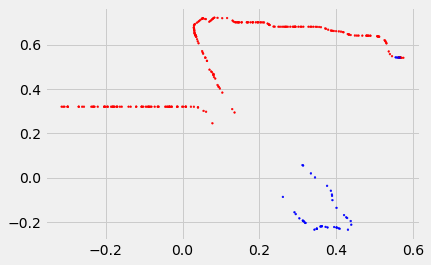

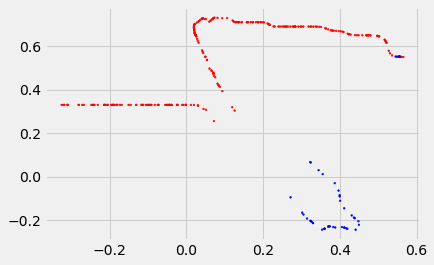

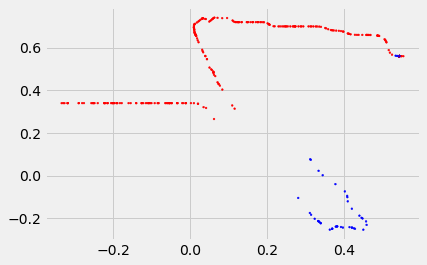

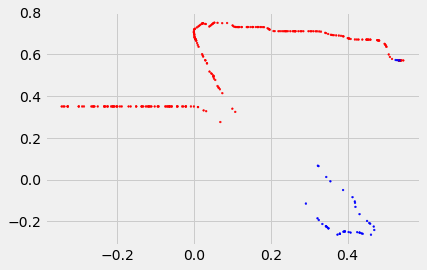

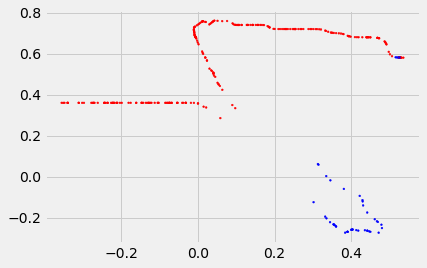

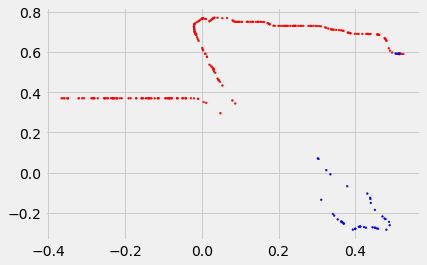

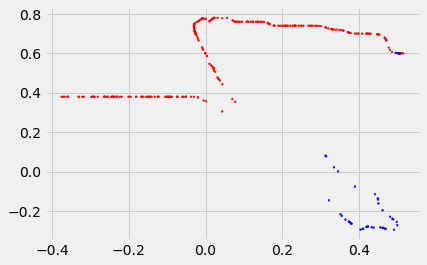

In [ ]:
from matplotlib import style

style.use('fivethirtyeight')

colors = ['r','b']
c = []
for i in range(len(label_test)):
  c.append(colors[int(label_test[i])])

def newoutput(i):

  f = features[:][:][i]
  fig = plt.figure()
  xs = f[:,0]
  ys = f[:,1]
  plt.scatter(xs, ys,color=c,s=3)

  plt.show()

fig = plt.figure()
plt.scatter(input_test[:,0],input_test[:,1],color=c,s=3)

for i in range(0,nlayer):
  newoutput(i)

**WE NOW CHECK WHAT IS THE "TIME" EVOLUTION OF THE MAXIMUM DISTANCE BETWEEN TWO POINTS IN THE EVOLVING DATASET**

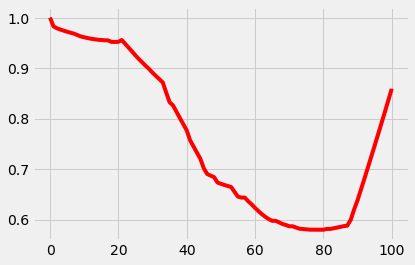

In [ ]:
def baricenter(data):
  
  l,v = data.get_shape()
  b = tf.reduce_sum(data, 0)
  b = tf.multiply(1/l,b)
  b = tf.reshape(b,[1,v])
  return b

def distanceMax(data):
  b = baricenter(data)
  l,v = data.get_shape()
  b = tf.repeat(b,repeats=[l],axis=0)
  diff = tf.math.subtract(data,b)
  n = tf.norm(diff, ord='euclidean', axis=1)
  return tf.math.reduce_max(n)

distanze = []
distanze.append(distanceMax(tf.convert_to_tensor(input_test)))

for i in range(0,nlayer):
  f = features[:][:][i]
  distanze.append(distanceMax(tf.convert_to_tensor(f)))

plt.plot(np.arange(101),distanze,'r-*',Markersize=1)